In [1]:
import pandas as pd

data = pd.read_csv('costumers.csv')

data.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
0,22572.91,1,0,30136.74,0.0,1
1,10609.64,1,1,53623.94,0.0,1
2,10079.48,0,1,18135.44,0.0,0
3,13871.35,1,0,30831.75,0.0,1
4,6541.46,0,1,20626.23,0.0,0


# EDA

In [2]:
data.shape

(500, 6)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            500 non-null    float64
 1   Credito_tipo_1     500 non-null    int64  
 2   Credito_tipo_2     500 non-null    int64  
 3   Limite_TC          500 non-null    float64
 4   Tiempo_cliente     500 non-null    float64
 5   Producto_ofrecido  500 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 23.6 KB


In [4]:
data.describe()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,12089.097380,0.610000,0.458000,44784.554960,4.327000,0.602000
std,5123.700116,0.488238,0.498732,22150.923996,4.784776,0.489976
min,-2911.650000,0.000000,0.000000,-22207.950000,0.000000,0.000000
25%,8534.350000,0.000000,0.000000,30096.285000,0.000000,0.000000
50%,11438.600000,1.000000,0.000000,47991.515000,0.000000,1.000000
75%,15171.467500,1.000000,1.000000,59108.175000,8.400000,1.000000
max,30041.400000,1.000000,1.000000,118636.820000,19.300000,1.000000


In [5]:
data.isnull().sum()

Salario              0
Credito_tipo_1       0
Credito_tipo_2       0
Limite_TC            0
Tiempo_cliente       0
Producto_ofrecido    0
dtype: int64

In [6]:
data['Credito_tipo_1'].value_counts()

Credito_tipo_1
1    305
0    195
Name: count, dtype: int64

In [7]:
pd.crosstab(data['Credito_tipo_1'], data['Producto_ofrecido'])

Producto_ofrecido,0,1
Credito_tipo_1,,
0,76,119
1,123,182


(array([  3.,  13.,  58., 127., 119.,  89.,  60.,  20.,   7.,   4.]),
 array([-2911.65 ,   383.655,  3678.96 ,  6974.265, 10269.57 , 13564.875,
        16860.18 , 20155.485, 23450.79 , 26746.095, 30041.4  ]),
 <BarContainer object of 10 artists>)

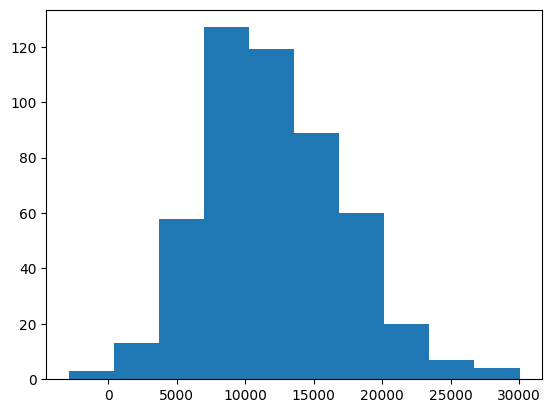

In [8]:
import matplotlib.pyplot as plt

plt.hist(data['Salario'])

In [9]:
data['Salario'].mean()

12089.09738

In [10]:
data['Salario'].median()

11438.6

# ESCALADO DE DATOS

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# METODO DEL CODO

In [13]:
from sklearn.cluster import KMeans

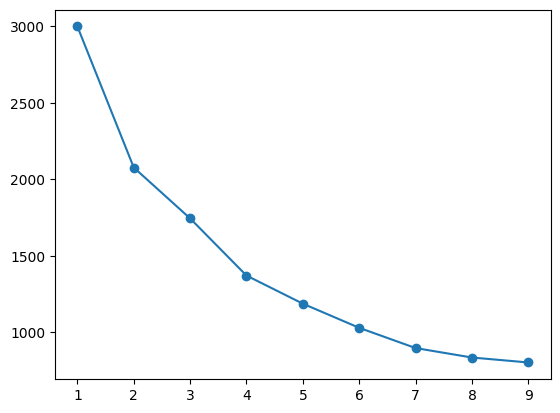

In [14]:
inertia = []
K = range(1, 10)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.plot(K, inertia, '-o')

# K-MEANS

In [15]:
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster_kmeans'] = kmeans.fit_predict(X_scaled)

data.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,cluster_kmeans
0,22572.91,1,0,30136.74,0.0,1,0
1,10609.64,1,1,53623.94,0.0,1,1
2,10079.48,0,1,18135.44,0.0,0,1
3,13871.35,1,0,30831.75,0.0,1,0
4,6541.46,0,1,20626.23,0.0,0,1


In [16]:
data['cluster_kmeans'].value_counts()

cluster_kmeans
0    272
1    228
Name: count, dtype: int64

# ANALISIS DE COMPONENTES PRINCIPALES (PCA)

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

In [19]:
# TRANSFORMAR A DATAFRAME DE PANDAS

pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = data['cluster_kmeans']

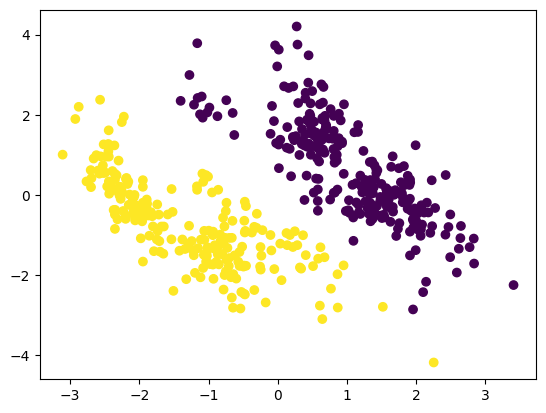

In [20]:
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['cluster'], cmap='viridis')

In [21]:
from sklearn.metrics import silhouette_score
silueta_kmeans = silhouette_score(X_scaled, data['cluster_kmeans'])
silueta_kmeans

0.31469048997662175

In [22]:
# !pip install joblib

In [23]:
import joblib

In [24]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [25]:
joblib.dump(pca, "pca.pkl")

['pca.pkl']

In [26]:
joblib.dump(kmeans, "kmeans.pkl")

['kmeans.pkl']

# NUEVOS CLIENTES

In [27]:
data_new = pd.read_csv('new_costumer.csv')
data_new.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,Tipo_de_cliente
0,19028.02,1,0,18845.91,0.0,1,3
1,17004.81,1,0,16421.36,0.0,0,2
2,12973.54,1,0,57295.44,9.6,1,2
3,13995.43,0,0,23556.17,7.7,0,3
4,13155.66,0,1,61073.59,10.2,1,0


In [28]:
data_new['Tipo_de_cliente'].value_counts()

Tipo_de_cliente
0    14
1    14
3    11
2    11
Name: count, dtype: int64

In [29]:
data_new.drop(data_new['Tipo_de_cliente'], axis=0)

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,Tipo_de_cliente
4,13155.66,0,1,61073.59,10.2,1,0
5,4195.63,0,1,46424.81,0.0,1,3
6,9676.05,1,0,36202.91,0.0,0,0
7,3192.72,1,1,76851.08,6.4,1,1
8,7539.78,0,1,62530.44,11.3,1,0
9,7271.86,1,0,64016.47,5.3,0,2
10,7159.60,0,1,42764.55,5.9,0,0
11,10565.71,0,1,16390.62,0.0,1,0
12,3048.88,1,1,63182.60,0.0,1,0
13,23628.51,1,0,16411.34,0.0,1,2


In [30]:
features = ['Salario', 'Credito_tipo_1', 'Credito_tipo_2', 'Limite_TC', 'Tiempo_cliente', 'Producto_ofrecido']
X_new = data_new[features]

In [31]:
X_new_scaled = scaler.transform(X_new)

In [32]:
data_new['cluster_pred'] = kmeans.predict(X_new_scaled)
data_new.head()

,Salario,Credito_tipo_1,Credito_tipo_2,Limite_TC,Tiempo_cliente,Producto_ofrecido,Tipo_de_cliente,cluster_pred
0,19028.02,1,0,18845.91,0.0,1,3,0
1,17004.81,1,0,16421.36,0.0,0,2,0
2,12973.54,1,0,57295.44,9.6,1,2,0
3,13995.43,0,0,23556.17,7.7,0,3,0
4,13155.66,0,1,61073.59,10.2,1,0,1


In [33]:
X_new_pca = pca.transform(X_new_scaled)

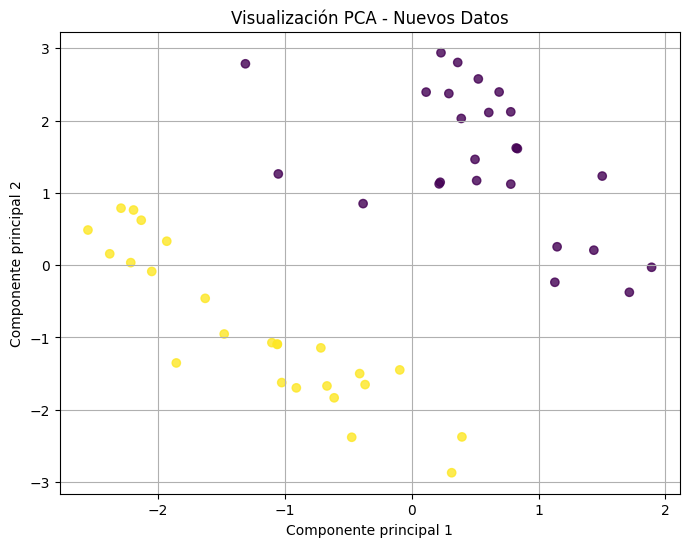

In [36]:
import matplotlib.pyplot as plt

# Crear el gráfico PCA
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_new_pca[:, 0], X_new_pca[:, 1],
                      c=data_new['cluster_pred'], alpha=0.8)

# Etiquetas y título
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Visualización PCA - Nuevos Datos')
plt.grid(True)
plt.show()
